## Work
1. 試比較有 BN 在 Batch_size = 2, 16, 32, 128, 256 下的差異,    看起來大batch_size 較佳

In [1]:
import os
import keras

# 本範例不需使用 GPU, 將 GPU 設定為 "無"
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.layers import BatchNormalization

"""
建立神經網路，並加入 BN layer
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = BatchNormalization()(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = BatchNormalization()(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [14]:
## 超參數設定
LEARNING_RATE = 1e-3
EPOCHS = 30
BATCH_SIZE = 1024
MOMENTUM = 0.95

In [16]:
results = {}
for batch_size in [64,128,256]:
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=batch_size, 
              validation_data=(x_test, y_test), 
              shuffle=True)

    # Collect results
    r = {}
    r['train_loss'] = model.history.history["loss"]
    r['valid_loss'] = model.history.history["val_loss"]
    r['train_acc'] = model.history.history["accuracy"]
    r['valid_acc'] = model.history.history["val_accuracy"]
    
    results[f'batch_size_{batch_size}'] = r

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_7 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_8 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batch_normalization_9 (Batch (None, 128)               512 

50000/50000 [==============================] - 57s 1ms/step - loss: 1.2153 - accuracy: 0.5722 - val_loss: 1.5135 - val_accuracy: 0.4695
Epoch 7/30
50000/50000 [==============================] - 57s 1ms/step - loss: 1.1636 - accuracy: 0.5907 - val_loss: 1.4755 - val_accuracy: 0.4793
Epoch 8/30
50000/50000 [==============================] - 57s 1ms/step - loss: 1.1216 - accuracy: 0.6067 - val_loss: 1.5448 - val_accuracy: 0.4727
Epoch 9/30
50000/50000 [==============================] - 57s 1ms/step - loss: 1.0820 - accuracy: 0.6211 - val_loss: 1.4476 - val_accuracy: 0.4984
Epoch 10/30
50000/50000 [==============================] - 57s 1ms/step - loss: 1.0426 - accuracy: 0.6332 - val_loss: 1.5193 - val_accuracy: 0.4815
Epoch 11/30
50000/50000 [==============================] - 60s 1ms/step - loss: 1.0085 - accuracy: 0.6461 - val_loss: 1.4841 - val_accuracy: 0.4810
Epoch 12/30
50000/50000 [==============================] - 59s 1ms/step - loss: 0.9738 - accuracy: 0.6583 - val_loss: 1.5568 - 

50000/50000 [==============================] - 51s 1ms/step - loss: 0.7339 - accuracy: 0.7493 - val_loss: 1.7400 - val_accuracy: 0.4568
Epoch 22/30
50000/50000 [==============================] - 52s 1ms/step - loss: 0.7088 - accuracy: 0.7602 - val_loss: 1.6639 - val_accuracy: 0.4817
Epoch 23/30
50000/50000 [==============================] - 51s 1ms/step - loss: 0.6814 - accuracy: 0.7692 - val_loss: 1.6308 - val_accuracy: 0.4720
Epoch 24/30
50000/50000 [==============================] - 51s 1ms/step - loss: 0.6572 - accuracy: 0.7781 - val_loss: 1.7309 - val_accuracy: 0.4664
Epoch 25/30
50000/50000 [==============================] - 51s 1ms/step - loss: 0.6294 - accuracy: 0.7871 - val_loss: 1.7739 - val_accuracy: 0.4630
Epoch 26/30
50000/50000 [==============================] - 52s 1ms/step - loss: 0.5947 - accuracy: 0.8026 - val_loss: 1.8276 - val_accuracy: 0.4601
Epoch 27/30
50000/50000 [==============================] - 53s 1ms/step - loss: 0.5733 - accuracy: 0.8095 - val_loss: 1.7490

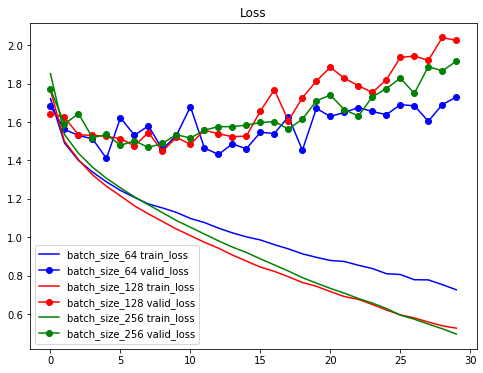

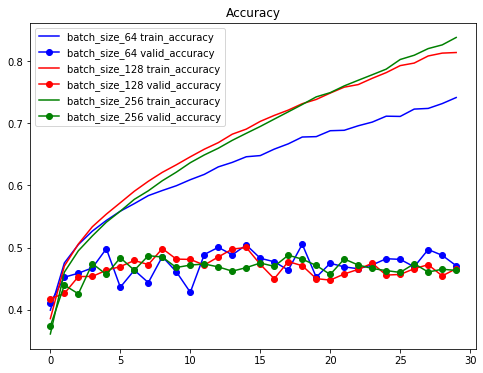

In [52]:
import matplotlib.pyplot as plt
%matplotlib inline
color = ['b','r','g','p','k']

plt.figure(figsize=(8,6))
for i,condition in enumerate(results.keys()):
    plt.plot(range(len(results[condition]['train_loss'])), results[condition]['train_loss'], label= f'{condition} train_loss',color = color[i])
    plt.plot(range(len(results[condition]['valid_loss'])), results[condition]['valid_loss'], '-o',label= f'{condition} valid_loss',color = color[i])
    plt.legend()
    plt.title("Loss")

plt.figure(figsize=(8,6))
for i,condition in enumerate(results.keys()):
    plt.plot(range(len(results[condition]['train_acc'])), results[condition]['train_acc'], label= f'{condition} train_accuracy',color = color[i])
    plt.plot(range(len(results[condition]['valid_acc'])), results[condition]['valid_acc'], '-o',label= f'{condition} valid_accuracy',color = color[i])
    plt.legend()
    plt.title("Accuracy")

## Work
2. 請嘗試將 BN 放在 Activation 之前，並比較訓練結果, 看起來較容易過擬合

In [53]:
from keras.layers import BatchNormalization , Activation

In [54]:
"""
建立神經網路，並加入 BN layer
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = BatchNormalization()(x)
            x = Activation('relu')(x)
        else:
            x = keras.layers.Dense(units=n_units,
                                   name="hidden_layer"+str(i+1))(x)
            x = BatchNormalization()(x)
            x = Activation('relu')(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [55]:
results_ba = {}
for batch_size in [256]:
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=batch_size, 
              validation_data=(x_test, y_test), 
              shuffle=True)

    # Collect results
    r = {}
    r['train_loss'] = model.history.history["loss"]
    r['valid_loss'] = model.history.history["val_loss"]
    r['train_acc'] = model.history.history["accuracy"]
    r['valid_acc'] = model.history.history["val_accuracy"]
    
    results_ba[f'batch_size_{batch_size}'] = r

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_16 (Batc (None, 512)               2048      
_________________________________________________________________
activation_1 (Activation)    (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_17 (Batc (None, 256)               1024      
_________________________________________________________________
activation_2 (Activation)    (None, 256)               0   

In [58]:
results_ba

{'batch_size_256': {'train_loss': [1.8626240295410157,
   1.5464188283920288,
   1.426368465576172,
   1.3407247396087647,
   1.2655954898834227,
   1.1988181284332275,
   1.1384963062286377,
   1.0786496943473816,
   1.0223811400985718,
   0.9670862777328492,
   0.9138843621826171,
   0.8607406256484985,
   0.8075710617065429,
   0.758064523448944,
   0.7095357162857056,
   0.6596586036300659,
   0.6155627829170227,
   0.570520243396759,
   0.5283744108581543,
   0.48504165859222415,
   0.4456431866645813,
   0.4086737384605408,
   0.37377681367874144,
   0.33505206594467163,
   0.30844368111610415,
   0.2786749603176117,
   0.25319155355453493,
   0.22895188158988952,
   0.20729069536209108,
   0.1873036548614502],
  'valid_loss': [1.7961486135482787,
   1.5818325288772583,
   1.5367443878173828,
   1.5196812358856202,
   1.5171393772125243,
   1.4620330471038818,
   1.4618399269104003,
   1.4866392570495606,
   1.5275282123565674,
   1.5044273288726806,
   1.5902032283782959,
   1.5

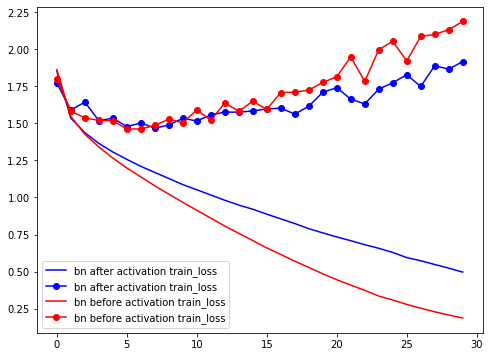

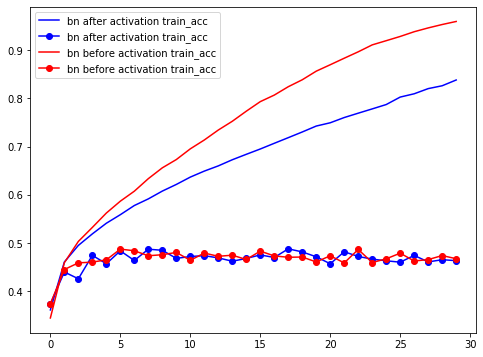

In [61]:
plt.figure(figsize=(8,6))
plt.plot(range(len(results['batch_size_256']['train_loss'])), results['batch_size_256']['train_loss'], label= 'bn after activation train_loss',color = color[0])
plt.plot(range(len(results['batch_size_256']['valid_loss'])), results['batch_size_256']['valid_loss'], '-o',label= 'bn after activation train_loss',color = color[0])
plt.plot(range(len(results_ba['batch_size_256']['train_loss'])), results_ba['batch_size_256']['train_loss'],label= 'bn before activation train_loss',color = color[1])
plt.plot(range(len(results_ba['batch_size_256']['valid_loss'])), results_ba['batch_size_256']['valid_loss'], '-o',label= 'bn before activation train_loss',color = color[1])
plt.legend()

plt.figure(figsize=(8,6))
plt.plot(range(len(results['batch_size_256']['train_acc'])), results['batch_size_256']['train_acc'], label= 'bn after activation train_acc',color = color[0])
plt.plot(range(len(results['batch_size_256']['valid_acc'])), results['batch_size_256']['valid_acc'], '-o',label= 'bn after activation train_acc',color = color[0])
plt.plot(range(len(results_ba['batch_size_256']['train_acc'])), results_ba['batch_size_256']['train_acc'],label= 'bn before activation train_acc',color = color[1])
plt.plot(range(len(results_ba['batch_size_256']['valid_acc'])), results_ba['batch_size_256']['valid_acc'], '-o',label= 'bn before activation train_acc',color = color[1])
plt.legend()

## Work
3. 請於 BN 放在 Input Layer 後，並比較結果

In [63]:
"""
建立神經網路，並加入 BN layer
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    x = BatchNormalization()(input_layer)
    
    for i, n_units in enumerate(num_neurons):
        
            x = keras.layers.Dense(units=n_units,
                                   activation = 'relu',
                                   name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [64]:
results_ib = {}
for batch_size in [256]:
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=batch_size, 
              validation_data=(x_test, y_test), 
              shuffle=True)

    # Collect results
    r = {}
    r['train_loss'] = model.history.history["loss"]
    r['valid_loss'] = model.history.history["val_loss"]
    r['train_acc'] = model.history.history["accuracy"]
    r['valid_acc'] = model.history.history["val_accuracy"]
    
    results_ib[f'batch_size_{batch_size}'] = r

Model: "model_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
batch_normalization_19 (Batc (None, 3072)              12288     
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,751,178
Trainable params: 1,745,034
Non-trainable params: 6,144
_____________________________________________

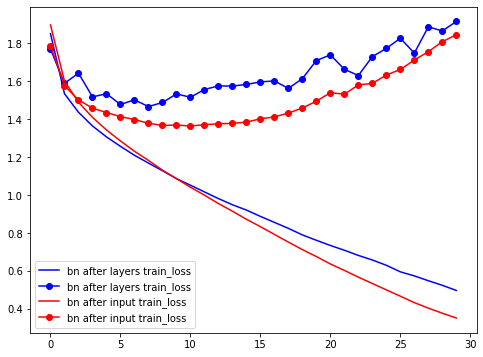

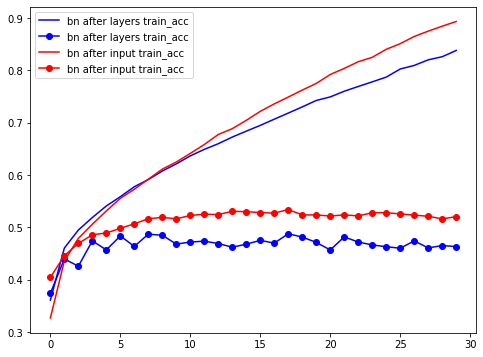

In [66]:
plt.figure(figsize=(8,6))
plt.plot(range(len(results['batch_size_256']['train_loss'])), results['batch_size_256']['train_loss'], label= 'bn after layers train_loss',color = color[0])
plt.plot(range(len(results['batch_size_256']['valid_loss'])), results['batch_size_256']['valid_loss'], '-o',label= 'bn after layers train_loss',color = color[0])
plt.plot(range(len(results_ib['batch_size_256']['train_loss'])), results_ib['batch_size_256']['train_loss'],label= 'bn after input train_loss',color = color[1])
plt.plot(range(len(results_ib['batch_size_256']['valid_loss'])), results_ib['batch_size_256']['valid_loss'], '-o',label= 'bn after input train_loss',color = color[1])
plt.legend()

plt.figure(figsize=(8,6))
plt.plot(range(len(results['batch_size_256']['train_acc'])), results['batch_size_256']['train_acc'], label= 'bn after layers train_acc',color = color[0])
plt.plot(range(len(results['batch_size_256']['valid_acc'])), results['batch_size_256']['valid_acc'], '-o',label= 'bn after layers train_acc',color = color[0])
plt.plot(range(len(results_ib['batch_size_256']['train_acc'])), results_ib['batch_size_256']['train_acc'],label= 'bn after input train_acc',color = color[1])
plt.plot(range(len(results_ib['batch_size_256']['valid_acc'])), results_ib['batch_size_256']['valid_acc'], '-o',label= 'bn after input train_acc',color = color[1])
plt.legend()